### Step1 - 导入相关包 & 初始化设置

In [4]:
import os, sys

from deepagents import create_deep_agent
from langchain.chat_models import init_chat_model
# 常用的消息类型
from langchain.messages import HumanMessage, SystemMessage, ToolMessage, AIMessage, AIMessageChunk

# 默读取当前目录下的 .env 文件, 可以通过 dotenv_path 来修改
from dotenv import load_dotenv
root_dir = os.path.dirname(os.getcwd())
load_dotenv(dotenv_path=os.path.join(root_dir, ".env"))

# 记录日志
from loguru import logger
logger.remove()
logger.add(sys.stderr, level=os.getenv("LOG_LEVEL"))

2

### Step2 - 创建 Agent 智能体

In [5]:
# 创建 ChatModel: v1 创建聊天模型的方法
chat_model = init_chat_model(
    model_provider="openai",
    # model 也可以写为 <model_provider>:<model_name> 的形式
    # 这样就可以不用指定 model_provider 这个参数了
    model = os.getenv("LMSTUDIO_LLM_MODEL"),
    base_url = os.getenv("LMSTUDIO_BASE_URL"),
    api_key=os.getenv("OPENAI_API_KEY"),
    max_tokens = 16384,
)
chat_model

ChatOpenAI(profile={}, client=<openai.resources.chat.completions.completions.Completions object at 0x000001F16AA7FA10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001F16AA7FCB0>, root_client=<openai.OpenAI object at 0x000001F16AA7D010>, root_async_client=<openai.AsyncOpenAI object at 0x000001F16CF825D0>, model_name='openai/gpt-oss-20b', model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='http://pc-wk1:1234/v1', max_tokens=16384)

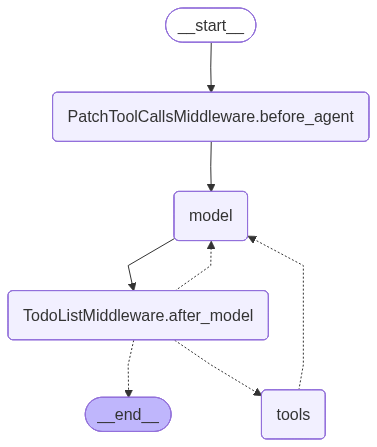

In [6]:
# 创建 DeepAgents
agent = create_deep_agent(
    model=chat_model,
    # 提示词可以不写, 这样也可以在调用时用 SystemMessage 来指定
    system_prompt="你是一个专业的AI助手, 请用简洁的方式回复用户的问题."
)
agent

### Step3 - 调用智能体

In [ ]:
# 方法1: 非流式调用
# 也可以按照如下格式来写: {"messages":[{"role": "user", "content": "请简单介绍一下你自己."}]}
response = agent.invoke({"messages":[HumanMessage("请简单介绍一下你自己.")]})
logger.debug(response)

for msg in response["messages"]:
    msg.pretty_print()

2026-02-23 21:28:27.556 | DEBUG    | __main__:<module>:4 - {'messages': [HumanMessage(content='请简单介绍一下你自己.', additional_kwargs={}, response_metadata={}, id='d3ef51e7-a3e4-4935-8ad6-c9fea4205279'), AIMessage(content='我是一个基于 GPT-4 架构的 AI 助手，专注于快速、准确地完成用户指令。能够阅读和编辑文件、执行子任务、生成文本与代码，并支持多种工具调用。', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 5170, 'total_tokens': 5233, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_provider': 'openai', 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'openai/gpt-oss-20b', 'id': 'chatcmpl-002fr153gfpk10eizq0lgj08', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019c8aaf-7fac-7ae0-b885-ca6bcee50857-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 5170, 'output_tokens': 63, 'total_tokens': 5233, 'input_token_details': {}, 'output_token_details': {}})]}


================================ Human Message =================================

请简单介绍一下你自己.
================================== Ai Message ==================================

我是一个基于 GPT-4 架构的 AI 助手，专注于快速、准确地完成用户指令。能够阅读和编辑文件、执行子任务、生成文本与代码，并支持多种工具调用。


In [9]:
# 方法2: 流式调用 & stream_mode 为 values
for chunk in agent.stream(
    ({"messages":[HumanMessage("请简单介绍一下你自己.")]}),
    stream_mode="values"):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

请简单介绍一下你自己.
================================ Human Message =================================

请简单介绍一下你自己.
================================== Ai Message ==================================

我是一款由 OpenAI 开发的大型语言模型，能够理解并生成多种语言的文本。我的主要功能包括回答问题、提供建议、撰写内容以及协助完成各种任务。


In [11]:
# 方法3: 流式调用 & stream_mode 为 messages
for chunk in agent.stream(
    {"messages":[HumanMessage("请简单介绍一下你自己.")]},
    stream_mode="messages"):
    # logger.debug(chunk)
    # (AIMessageChunk(content='我是', additional_kwargs={}, response_metadata={'model_provider': 'openai'}, id='lc_run--019c8ab2-2fc2-78d2-9699-1b96ecb61832', tool_calls=[], invalid_tool_calls=[], tool_call_chunks=[]), 
    # {'langgraph_step': 2, 'langgraph_node': 'model', 'langgraph_triggers': ('branch:to:model',), 
    #  'langgraph_path': ('__pregel_pull', 'model'), 'langgraph_checkpoint_ns': 'model:b918c103-bc8f-e25b-e7f4-5fab4a7b0602', 
    #  'checkpoint_ns': 'model:b918c103-bc8f-e25b-e7f4-5fab4a7b0602', 
    #  'ls_provider': 'openai', 'ls_model_name': 'openai/gpt-oss-20b', 'ls_model_type': 'chat', 'ls_temperature': None, 'ls_max_tokens': 16384
    # })
    if isinstance(chunk[0], AIMessageChunk):
        print(chunk[0].content, end="", flush=True)


我是一个基于 OpenAI GPT-4 架构的 AI 助手，旨在帮助完成各种任务、回答问题和提供信息。